In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

pd.set_option('max_colwidth', 100)

In [2]:
import gc
from const import *
import utils

In [10]:
reload(utils)

<module 'utils' from 'utils.py'>

In [3]:
import xgboost as xgb

from sklearn.datasets import make_classification

/home/damonhao/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
df_order = pd.read_csv('../input/orders.csv')

In [10]:
df_order.columns[df_order.isnull().any()]

Index([u'days_since_prior_order'], dtype='object')

In [12]:
(df_order.days_since_prior_order.isnull()).sum() / float(df_order.shape[0])

0.06027594185817766

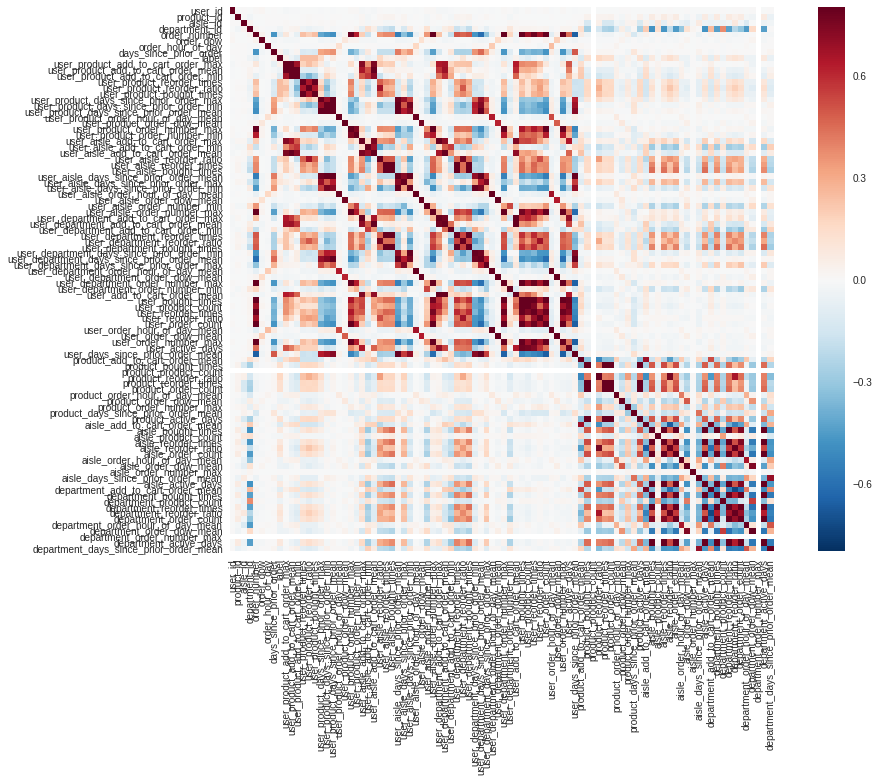

In [6]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr, vmax=.8, square=True)

In [11]:
count = 0
targets = ['order_number-user_product_order_number_max', 'order_number-user_aisle_order_number_max', 'order_number-user_department_order_number_max']
for row in df_feature.itertuples():
    if row.features in targets:
        print row.Index, row.features, row.scores

9 order_number-user_product_order_number_max 538
97 order_number-user_aisle_order_number_max 107
108 order_number-user_department_order_number_max 72


In [12]:
df_feature2 = get_feature_score(model._Booster.get_score(importance_type='gain'))

In [13]:
for row in df_feature2.itertuples():
    if row.features in targets:
        print row.Index, row.features, row.scores

0 order_number-user_product_order_number_max 2018.09272214
31 order_number-user_aisle_order_number_max 20.7001706168
33 order_number-user_department_order_number_max 20.2110951806


In [14]:
df_feature2.head(10)

,features,scores
0,order_number-user_product_order_number_max,2018.092722
1,user_product_bought_times/user_order_count,1131.978282
2,user_product_reorder_ratio,821.354009
3,user_product/user_department_reorder_times,704.814003
4,user_product_order_number_max/user_order_numbe...,467.845032
5,user_product_reorder_ratio/user_reorder_ratio,271.710719
6,user_product/user_aisle_reorder_times,184.427404
7,product_reorder_ratio,144.681429
8,user_product_bought_times/user_product_order_n...,112.353352
9,user_aisle_reorder_ratio,78.015308


In [15]:
df_feature.head(10)

,features,scores
0,user_reorder_ratio,1001
1,user_product_days_since_prior_order/user_produ...,773
2,days_since_prior_order,718
3,product_reorder_ratio,692
4,user_product_bought_times/user_order_count,690
5,user_product_order_number_max/user_order_numbe...,657
6,user_product_days_since_prior_order/user_produ...,614
7,product_reorder_times,584
8,product_days_since_prior_order_mean,583
9,order_number-user_product_order_number_max,538


In [21]:
for row in df_feature.itertuples():
    if row.features.endswith('_rank'):
        print row.Index, row.features, row.scores

36 user_product/user_department_order_number_max_rank 279
42 user_product/user_department_reorder_times_pct_rank 260
49 user_product/user_department_order_number_min_rank 242
57 user_product/user_department_order_number_max_pct_rank 218
63 user_product/user_department_order_number_min_pct_rank 203
64 user_product/user_department_reorder_ratio_rank 203
66 user_product/user_aisle_order_number_max_rank 198
80 user_product/user_aisle_order_number_min_rank 151
84 user_product/user_department_add_to_cart_order_min_rank 148
86 user_product/user_aisle_reorder_times_pct_rank 142
87 user_product/user_department_add_to_cart_order_mean_rank 140
89 user_product/user_aisle_bought_times_rank 136
90 user_product/user_department_add_to_cart_order_mean_pct_rank 136
91 user_product/user_aisle_order_number_max_pct_rank 136
95 user_product/user_department_add_to_cart_order_min_pct_rank 129
100 user_product/user_aisle_add_to_cart_order_min_rank 117
109 user_product/user_aisle_order_number_min_pct_rank 98
11

In [18]:
df_feature2 = get_feature_score(model._Booster.get_score(importance_type='gain'))
# df_feature2

In [19]:
for row in df_feature2.itertuples():
    if row.features.endswith('_id'):
        print row.Index, row.features, row.scores

49 department_id 18.2734495333
65 product_id 13.8056941023
122 aisle_id 10.6183097869


In [20]:
df_feature2.shape

(142, 2)

In [19]:
get_feature_score(model._Booster.get_score(importance_type='gain'))

,features,scores
0,user_product_reorder_ratio,1800.272038
1,order_number,319.937564
2,user_product_bought_times,280.579356
3,user_product_order_number_max,155.795046
4,product_reorder_ratio,141.770392
5,user_product_order_number_min,95.360396
6,user_product_count,75.696377
7,user_product_days_since_prior_order_max,58.640863
8,user_aisle_order_number_max,58.293609
9,aisle_reorder_ratio,47.455132


In [3]:
# name = 'XGBClassifier_colsample_bytree:0.8_learning_rate:0.1_max_depth:8_n_estimators:150_scale_pos_weight:5.0_seed:0_subsample:0.8_07-22-18-22-57.pkl'
name = 'XGBClassifier_colsample_bytree:0.8_learning_rate:0.05_max_depth:8_n_estimators:150_scale_pos_weight:2_seed:0_subsample:0.8_07-26-19-51-30.pkl'
xgb_model = utils.load_model(name)

/home/damonhao/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
df_feature_weight = utils.get_feature_score(xgb_model._Booster.get_fscore())

In [7]:
for row in df_feature_weight.itertuples():
    if 'std' in row.features:
        print row.Index, row.features, row.scores

18 user_add_to_cart_order_std 413
19 user_days_since_prior_order_std 395
22 product_days_since_prior_order_std 364
25 user_order_hour_of_day_std 340
26 user_order_dow_std 339
31 product_order_dow_std 314
36 product_add_to_cart_order_std 287
45 product_order_hour_of_day_std 265
53 user_department_order_dow_std 229
67 user_department_days_since_prior_order_std 191
70 user_department_order_hour_of_day_std 189
73 user_department_add_to_cart_order_std 185
74 aisle_days_since_prior_order_std 183
76 user_aisle_order_hour_of_day_std 176
82 user_aisle_order_dow_std 159
88 user_aisle_days_since_prior_order_std 150
89 aisle_order_hour_of_day_std 150
90 user_aisle_add_to_cart_order_std 146
92 department_days_since_prior_order_std 140
94 aisle_order_dow_std 138
99 user_product_days_since_prior_order_std 129
101 aisle_add_to_cart_order_std 126
116 user_product_add_to_cart_order_std 93
117 user_product_order_hour_of_day_std 92
129 user_product_order_dow_std 71
135 department_order_hour_of_day_std 57


In [8]:
df_feature_weight.head(20)

,features,scores
0,user_reorder_ratio,1450
1,user_product_days_since_prior_order/user_product_days_since_prior_order_mean,1197
2,days_since_prior_order,1033
3,user_product_bought_times/user_order_count,996
4,order_number-user_product_order_number_max,965
5,product_reorder_ratio,904
6,user_product_order_number_max/user_order_number_max,765
7,user_product_days_since_prior_order/user_product_days_since_prior_order_min,740
8,product_reorder_times,676
9,user_product_bought_times/user_product_order_number_max-user_product_order_number_min,641


In [20]:
df_feature_gain.head()

,features,scores
0,order_number-user_product_order_number_max,6349.983965
1,user_product_bought_times/user_order_count,3507.669719
2,user_product_bought_times,2974.151798
3,user_product_bought_times/user_product_order_number_max-user_product_order_number_min,2625.655071
4,user_product_order_number_max/user_order_number_max,1301.172113


In [13]:
df_feature_weight.head(30)

,features,scores
0,user_reorder_ratio,1009
1,user_product_days_since_prior_order/user_product_days_since_prior_order_mean,997
2,product_reorder_ratio,761
3,days_since_prior_order,739
4,order_number-user_product_order_number_max,704
5,user_product_order_number_max/user_order_number_max,700
6,user_product_bought_times/user_order_count,622
7,user_product_days_since_prior_order/user_product_days_since_prior_order_min,607
8,product_days_since_prior_order_mean,589
9,user_bought_times/user_active_days,533


In [4]:
df_feature_gain = utils.get_feature_score(xgb_model._Booster.get_score(importance_type='gain'))

In [5]:
for row in df_feature_gain.itertuples():
    if 'std' in row.features:
        print row.Index, row.features, row.scores

17 department_days_since_prior_order_std 105.518229651
27 user_product_order_hour_of_day_std 54.18726
30 product_add_to_cart_order_std 52.4091804317
48 aisle_add_to_cart_order_std 35.552478373
50 aisle_days_since_prior_order_std 34.2559538798
64 product_days_since_prior_order_std 28.5145921703
72 user_add_to_cart_order_std 27.4501181695
73 user_days_since_prior_order_std 27.2547801418
77 department_order_hour_of_day_std 26.4293782456
86 department_order_dow_std 24.7414310556
90 aisle_order_dow_std 24.187277029
93 aisle_order_hour_of_day_std 23.6168116
101 department_add_to_cart_order_std 22.247135
103 product_order_dow_std 22.0779804204
107 user_department_add_to_cart_order_std 21.4441326486
112 user_aisle_order_hour_of_day_std 20.2279252273
119 user_department_days_since_prior_order_std 19.5940396545
120 user_product_days_since_prior_order_std 19.4420164031
122 user_aisle_order_dow_std 19.4171658176
125 product_order_hour_of_day_std 19.2925514158
127 user_aisle_add_to_cart_order_std 1

In [23]:
df_feature_gain.tail(30)

,features,scores
88,user_product_add_to_cart_order_min/user_order_size_mean,40.875310
89,product_order_dow_mean,40.859635
90,user_product/user_aisle_bought_times,40.707072
91,user_product/user_department_add_to_cart_order_min,40.686650
92,user_aisle_reorder_times,40.672998
93,product_order_hour_of_day_mean,39.993138
94,user_department_reorder_ratio/user_reorder_ratio,39.525978
95,user_order_hour_of_day_mean,39.082489
96,user_department_order_number_min,38.965559
97,user_department_add_to_cart_order_min/user_order_size_mean,38.670775


In [16]:
df_feature_cover = utils.get_feature_score(xgb_model._Booster.get_score(importance_type='cover'))

In [17]:
df_feature_cover.head(30)

,features,scores
0,order_dow,126496.586264
1,user_product_bought_times/user_order_count,108053.375959
2,order_number-user_product_order_number_max,83362.051797
3,order_number-user_department_order_number_max,83181.166530
4,user_product_bought_times,72113.309437
5,user_add_to_cart_order_mean,69524.759041
6,user_reorder_ratio,62553.147196
7,department_id,60690.651280
8,user_product/user_aisle_order_number_min,59678.912310
9,order_hour_of_day,59573.424024


In [11]:
utils.get_feature_all_type_score('user_product_add_to_cart_order_mean', xgb_model)

weight
0.720338983051
                               features  scores
84  user_product_add_to_cart_order_mean     150
gain
0.898305084746
                                features     scores
105  user_product_add_to_cart_order_mean  37.364403
cover
0.262711864407
                               features        scores
30  user_product_add_to_cart_order_mean  37823.727666


In [41]:
utils.get_feature_all_type_score('user_product_order_dow_mean', xgb_model)

weight
                       features  scores
72  user_product_order_dow_mean     183
gain
                        features     scores
106  user_product_order_dow_mean  37.166986
cover
                       features        scores
53  user_product_order_dow_mean  25414.658567


In [29]:
df_val = pd.read_csv(INPUT_DIR+"validate_sample_diff.csv")

In [32]:
no_use = df_val.columns[~df_val.columns.isin(df_feature_weight.features)]

In [31]:
drop_list = ['user_product_reorder_times', 'product/department_bought_times', 'user_order_number_max', 'user_bought_times', 'user_id', 'aisle_bought_times', 'department_bought_times', 'product_bought_times', 'user_order_size_mean', 'department_reorder_times', 'user_aisle_bought_times', 'product_order_count', 'product/aisle_reorder_times', 'aisle_order_count', 'user_product_days_since_prior_order/user_product_days_since_prior_order_max', 'user_department_bought_times', 'aisle_reorder_times', 'user_department_order_number_max', 'product_active_days', 'order_number']

In [33]:
no_use[~no_use.isin(drop_list)]

Index([u'label', u'product_product_count', u'aisle_order_number_max',
       u'department_order_number_max'],
      dtype='object')

In [48]:
df = pd.read_csv(INPUT_DIR+"validate_sample_std.csv")

In [49]:
(df.user_product_days_since_prior_order_std.isnull()).sum()

62

In [ ]:
(df.user_product_add_to_cart_order_std.isnull()).sum()

In [51]:
a = df[df.user_product_days_since_prior_order_std.isnull()].head(3)

In [52]:
a

,user_id,product_id,aisle_id,department_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,label,user_product_add_to_cart_order_max,...,product_order_dow_std,product_days_since_prior_order_std,aisle_add_to_cart_order_std,aisle_order_hour_of_day_std,aisle_order_dow_std,aisle_days_since_prior_order_std,department_add_to_cart_order_std,department_order_hour_of_day_std,department_order_dow_std,department_days_since_prior_order_std
274,201517,33189,117,19,13,2,13,8.0,0.0,4,...,2.164202,8.353481,7.905295,4.271723,2.031021,8.651035,7.692491,4.162535,2.025351,8.664680
379,186407,19887,91,16,22,6,20,26.0,0.0,2,...,1.904823,9.790501,6.263449,4.284031,2.073805,8.684187,6.611611,4.258445,2.082395,8.663175
705,201665,5746,53,16,9,4,15,30.0,0.0,1,...,2.151931,8.840338,6.267580,4.112268,2.024435,8.510458,6.611611,4.258445,2.082395,8.663175


In [20]:
a.user_product_add_to_cart_order_std

2    NaN
50   NaN
54   NaN
Name: user_product_add_to_cart_order_std, dtype: float64

,user_id,product_id,aisle_id,department_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,label,user_product_add_to_cart_order_max,...,product_order_dow_std,product_days_since_prior_order_std,aisle_add_to_cart_order_std,aisle_order_hour_of_day_std,aisle_order_dow_std,aisle_days_since_prior_order_std,department_add_to_cart_order_std,department_order_hour_of_day_std,department_order_dow_std,department_days_since_prior_order_std
2,202279,9327,104,13,9,1,14,30.0,0.0,3,...,2.143791,9.184589,7.994790,4.224492,2.124950,9.114491,7.875241,4.248053,2.099553,9.039313
50,201744,9436,83,4,14,4,13,30.0,0.0,10,...,2.187343,8.483251,6.855405,4.274577,2.144651,8.789461,6.658899,4.288993,2.114938,8.647263
54,183833,383,34,1,19,0,12,7.0,0.0,4,...,2.175683,8.558039,7.600188,4.307876,2.093168,9.141790,7.393502,4.262731,2.118325,8.977937


In [13]:
import generate_feature

In [17]:
reload(generate_feature)

<module 'generate_feature' from 'generate_feature.py'>

In [18]:
df_prior = generate_feature.load_prior_order_products()

In [53]:
df_prior[(df_prior.user_id==201517) & (df_prior.product_id==33189)]

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
2479,270,33189,4,0,117,19,201517,1,3,10,NaN


In [23]:
b = df_prior[df_prior.user_id==202279]

In [40]:
b[b.product_id==1819]

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
7,2,1819,8,1,88,13,202279,3,5,9,8.0
14214778,1500071,1819,11,0,88,13,202279,2,4,13,20.0


In [34]:
c = b.groupby([UID, PID]).agg({'add_to_cart_order': {'user_product_add_to_cart_order_std': np.nanstd}})

In [33]:
b[b.product_id==2086]

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
22590998,2382766,2086,13,0,54,17,202279,7,1,14,24.0


In [30]:
d = b.groupby([UID, PID]).agg({'add_to_cart_order': {'user_product_add_to_cart_order_std': np.mean}})

# Error Analysis

In [4]:
df_predict = pd.read_csv('../prediction/validate_diff.csv')

In [7]:
df_validate = pd.read_csv('../input/validate_diff.csv')

In [10]:
df_result = df_predict.merge(df_validate, how='left', on=[UID, PID])

In [11]:
df_result.head()

,user_id,product_id,proba,aisle_id,department_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,label,...,user_department_reorder_ratio/user_reorder_ratio,user_product_bought_times/user_product_order_number_max-user_product_order_number_min,user_product_days_since_prior_order/user_product_days_since_prior_order_max,user_product_days_since_prior_order/user_product_days_since_prior_order_min,user_product_days_since_prior_order/user_product_days_since_prior_order_mean,user_bought_times/user_active_days,user_order_count/user_active_days,order_number-user_product_order_number_max,order_number-user_aisle_order_number_max,order_number-user_department_order_number_max
0,178074,19318,0.991266,17,13,13,5,11,7.0,1.0,...,1.000000,1.090909,0.466667,7.000000,1.283333,0.200000,0.200000,1,1,1
1,181856,9292,0.985695,84,16,48,1,14,7.0,1.0,...,1.081747,1.021739,0.350000,inf,0.904494,0.130977,0.097713,1,1,1
2,196984,21137,0.983966,24,4,40,3,20,6.0,1.0,...,1.025641,1.026316,0.600000,6.000000,1.112195,0.189573,0.184834,1,1,1
3,172234,17207,0.983950,120,16,13,0,10,0.0,1.0,...,1.031250,1.090909,0.000000,NaN,0.000000,0.071956,0.022140,1,1,1
4,190825,27845,0.983437,84,16,19,6,16,7.0,1.0,...,1.085082,1.058824,0.466667,1.400000,0.937008,0.139092,0.013177,1,1,1


In [13]:
df_positive = df_result[df_result.label == 1]

In [ ]:
df_false_neg = 

In [14]:
fn_num = (df_positive.proba <= 0.5).sum()

In [15]:
fn_num / float(df_positive.shape[0])

0.42497754901547158

In [3]:
from ensemble import EnsembleClassifier

In [4]:
model = utils.load_model('Stacker:LogisticRegression_07-23-16-13-47.pkl')

In [7]:
model.stacker_grid_cv.best_score_

0.80449754755373393

# test

In [22]:
a = Series([1, 1, 2, 3])

In [26]:
a.rank(method='dense')

0    1.0
1    1.0
2    2.0
3    3.0
dtype: float64

In [27]:
a.rank(method='min')

0    1.0
1    1.0
2    3.0
3    4.0
dtype: float64

In [28]:
a.rank(method='dense', pct=True)

0    0.25
1    0.25
2    0.50
3    0.75
dtype: float64

In [12]:
df1 = pd.DataFrame({'a':[1, ]})
df2 = df1[['a']]

In [19]:
df1 = pd.DataFrame({'a':[1, 2]})
df2 = pd.DataFrame({'a': df1['a']})

In [20]:
df1.a.values.base is df2.a.values.base

False

In [23]:
id(df1.a)

140657602143440

In [24]:
id(df2.a)

140658705493456

In [5]:
df2['b'] = 2

In [1]:
603/float(1527)

0.3948919449901768